# Exercice (avec indices légers) : Classification Iris avec LDA

Objectif : compléter les `__` pour entraîner un classifieur **LDA** sur Iris (2 variables), puis évaluer le modèle.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Rappel utile : vocabulaire des métriques de classification
data = {
    "Anglais": ["Accuracy", "Precision", "Recall"],
    "Bonne traduction": ["Exactitude", "Précision", "Rappel / Sensibilité"],
    "Ce que ça mesure": [
        "Taux global de bonnes réponses",
        "Parmi les positifs prédits, combien sont corrects",
        "Parmi les vrais positifs, combien sont détectés"
    ]
}

pd.DataFrame(data)

,Anglais,Bonne traduction,Ce que ça mesure
0,Accuracy,Exactitude,Taux global de bonnes réponses
1,Precision,Précision,"Parmi les positifs prédits, combien sont corrects"
2,Recall,Rappel / Sensibilité,"Parmi les vrais positifs, combien sont détectés"


In [4]:
# 1) Charger le dataset Iris
iris_data = load_iris()

#print(iris_data['data'])


#x = [[1, 2, 3, 4], [1, 2, 5, 5], [3, 2, 5, 5]]
#print( (iris_data['data'].T)[0:2].T)

#iris_data

<details><summary><b>Indice</b></summary>
Une fonction d'importation des données Iris a déjà été importée depuis <code>sklearn.datasets</code>.
</details>

In [5]:
# 2) Restreindre X aux 2 premières features
X = (iris_data['data'].T)[0:2].T #iris_data['data'][:, ]
y = iris_data['target']

#print(X)

print("Features utilisées :", iris_data.feature_names[0], "et", iris_data.feature_names[1])
print("Nom des classes    :", iris_data.target_names)

Features utilisées : sepal length (cm) et sepal width (cm)
Nom des classes    : ['setosa' 'versicolor' 'virginica']


<details><summary><b>Indice</b></summary>
On ne garde que deux colonnes correspondant aux mesures du sépale.
</details>

In [6]:
# 3) Train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<details><summary><b>Indice</b></summary>
On sépare les variables explicatives et la variable cible, puis on fixe une proportion pour le test.
</details>

In [12]:
# 4) Modèle LDA
clf = LinearDiscriminantAnalysis()

# option : 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#clf = QuadraticDiscriminantAnalysis()
from sklearn import svm
clf = svm.SVC()

clf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


<details><summary><b>Indice</b></summary>
Le modèle utilisé est une méthode d'analyse discriminante linéaire de sklearn.
</details>

In [13]:
# 5) Prédictions
y_pred = clf.predict(X_test)

<details><summary><b>Indice</b></summary>
On applique le modèle appris aux données de test.
</details>

In [14]:
# 6) Matrice de confusion
class_names = iris_data.target_names
cm = confusion_matrix(y_test, y_pred)

print("\nLecture : lignes = vraies classes | colonnes = classes prédites")
pd.DataFrame(cm, index=class_names, columns=class_names)


Lecture : lignes = vraies classes | colonnes = classes prédites


,setosa,versicolor,virginica
setosa,19,0,0
versicolor,0,7,6
virginica,0,3,10


<details><summary><b>Indice</b></summary>
Cette matrice compare les classes réelles aux classes prédites.
</details>

In [15]:
# 7) Exactitude et rapport
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy : {acc:.3f}")

# Rapport de classification
report = classification_report(y_test, y_pred, target_names=class_names)
print("\nRapport de classification :")
print(report)


Accuracy : 0.800

Rapport de classification :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.70      0.54      0.61        13
   virginica       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



<details><summary><b>Indice</b></summary>
Ces métriques s'appuient sur la comparaison entre vérité terrain et prédictions.
</details>

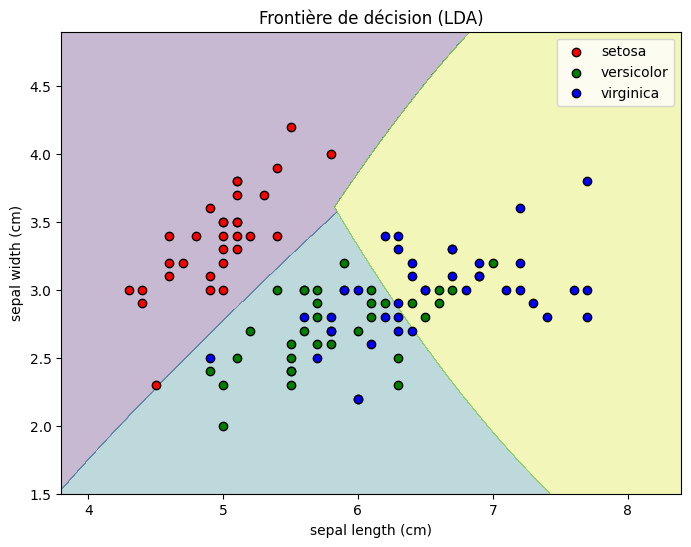

In [16]:
# 8) Visualiser la séparation de l'espace des paramètres (frontière de décision)
# Objectif : afficher les régions de décision du classifieur LDA dans le plan (feature 1, feature 2).

# Grille couvrant l'espace des données
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.002),
    np.arange(y_min, y_max, 0.002)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]

# Prédire sur la grille (à compléter)
Z = clf.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)

# Afficher les points d'entraînement
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.scatter(
        X_train[y_train == i, 0], X_train[y_train == i, 1],
        c=color, label=class_names[i], edgecolor='k'
    )

plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])
plt.legend()
plt.title("Frontière de décision (LDA)")
plt.show()

<details><summary><b>Indice</b></summary>
On veut prédire la classe pour chaque point de la grille (le tableau <code>grid_points</code>).
</details>